# 13wk-1: Plotly – `pio`, `go`

최규빈  
2023-11-27

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/13wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

[????](????)

# 2. Imports

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#---#
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [16]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 3. Intro

## A. 궁금해

12wk-2 강의노트중..

In [55]:
df_sample = pd.DataFrame(
    {'path':['A','A','B','B','B'],
     'lon':[-73.986420,-73.995300,-73.975922,-73.988922,-73.962654],
     'lat':[40.756569,40.740059,40.754192,40.762859,40.772449]}
)
fig = px.line_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    line_group = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
)
scatter_data = px.scatter_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
).data 
fig.add_trace(scatter_data[0])
fig.add_trace(scatter_data[1])
fig.show(config={'scrollZoom':False})

도데체 저런코드는 어떻게 알아내는 걸까?

## B. 심슨의 역설 데이터

`-` 아래의 자료를 관찰하자.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df.head()

## C. `plotly`의 시각화구조

`-` 아래와 같은 방법이 가능하다.

-   pandas backend
-   `px`, 즉 `plotly.express`를 이용한 시각화
-   `go`, 즉 `plotly.graph_objects`를 이용한 시각화
-   `pio`, 즉 `plotly.io`를 이용한 시각화

`-` 예시1: pandas backend

In [5]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)

`-` 예시2: `px.bar`를 이용한 plot

In [51]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    tidydata, 
    x = 'gender', y = 'rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)

`-` 예시3: `px.bar`를 이용한 플랏 (pandas Series를 입력) – 결과가 조금
다름

In [7]:
tidydata

In [8]:
px.bar(
    x = tidydata.gender, y = tidydata.rate,
    color = tidydata.gender, 
    text = tidydata.rate, 
    title='버클리대학교의 남녀합격률',
    width=600
)

-   x축,y축,legend의 제목이 살짝 달라지긴 했음..

`-` 예시4: `px.bar`를 이용한 플랏 (list를 입력) – 결과가 조금 다름

In [9]:
px.bar(
    x = ['female','male'], y = [0.42,0.52],
    color = ['female','male'], 
    text = [0.42,0.52], 
    title = '버클리대학교의 남녀합격률',
    width = 600
)

`# 예시5`: `go`를 이용한 시각화 – 색깔시각화가 불가능

`-` ggplot() + geom_col() 의 느낌으로!

In [17]:
fig = go.Figure()
fig 

In [18]:
bar = go.Bar(
    x = ['female','male'], y = [0.42,0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar).update_layout(layout)

-   색을 어떻게 구분하냐?

`#`

`# 예시6`: `go`를 이용한 시각화 – matplotlib의 겹쳐그리기 감성 구현
($\star$)

`(예비학습)` – 이런느낌이 있었지

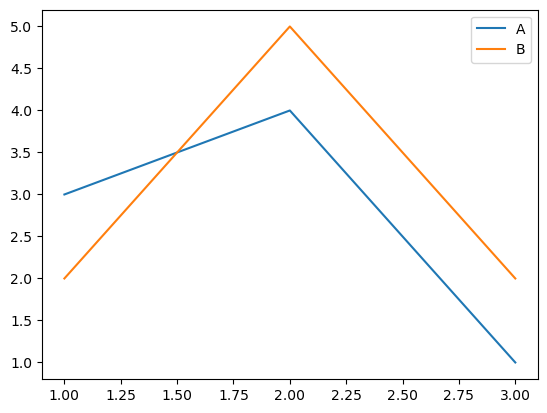

In [37]:
plt.plot([1,2,3],[3,4,1],label='A')
plt.plot([1,2,3],[2,5,2],label='B')
plt.legend()

이걸 응용하면

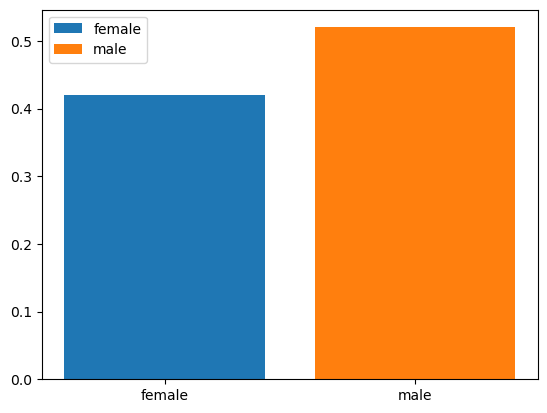

In [39]:
plt.bar('female',0.42,label='female')
plt.bar('male',0.52,label='male')
plt.legend()

`#`

예비학습에서 힌트를 얻으면!

In [41]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42]
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`# 예시7`: `go`를 이용한 시각화 – 색상의 변경

-   여자는 빨강, 남자는 파랑으로?

In [13]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42],
    marker = {'color':'red'}
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'blue'}
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

`# 예시8`: `go`를 이용한 시각화 – 색상재설정 + x축, y축, legend의
title의 설정 + hover 설정

-   색상설정: `#EF553B`,`#636efa`
-   hovertemplate: `'gender=%{x}<br>rate=%{text}<extra></extra>'`

In [53]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42],
    marker = {'color':'#EF553B'},
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'#636efa'},
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'
)
layout = {
    'title':'버클리대학교의 남녀합격률',
    'width':600,
    'legend':{'title':'gender'},
    'xaxis':{'title':'gender'},
    'yaxis':{'title':'rate'}
}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

***궁금: `#EF553B` 이런거 어떻게 알았어?…***

In [54]:
fig = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)
fig.data

## D. `px` vs `go`

`-` `go`는 핸드메이드 제품을 `px`는 양산품을 만든다고 이해하면 편리하다.

-   `go`의 특징: 유저의 자유도가 매우 높음 (내가 직접 하는 느낌). 이는
    그림의 크기, 색상 등을 선호에 맞게 조정하기 유리. 생산성이 낮음.
-   `px`의 특징: 유저의 자유도가 낮음 (알아서 해주는 느낌). 원하는
    그림을 빠르게 생산할 수 있음. 다만 내가 원하는 디자인이 나오지 않을
    수 있음.

`-` 뭘 써야 할까?

-   `px`를 쓰는게 좋다.
-   그런데 `go`를 이용하여 그림이 그려지는 원리를 이해하면 이후에 `px`를
    이용한 그림을 수정하기 용이하다.
-   전략: `px`로 그림을 그린다. + `go`로 수정한다.

# 2. `pio`를 이용한 시각화

## A. 함수의 입력 (예비학습)

`예제1` – 두 벡터 x,y가 주어졌을때 `R`에서 cbind와 같은 역할을 하는
함수를 구현하라.

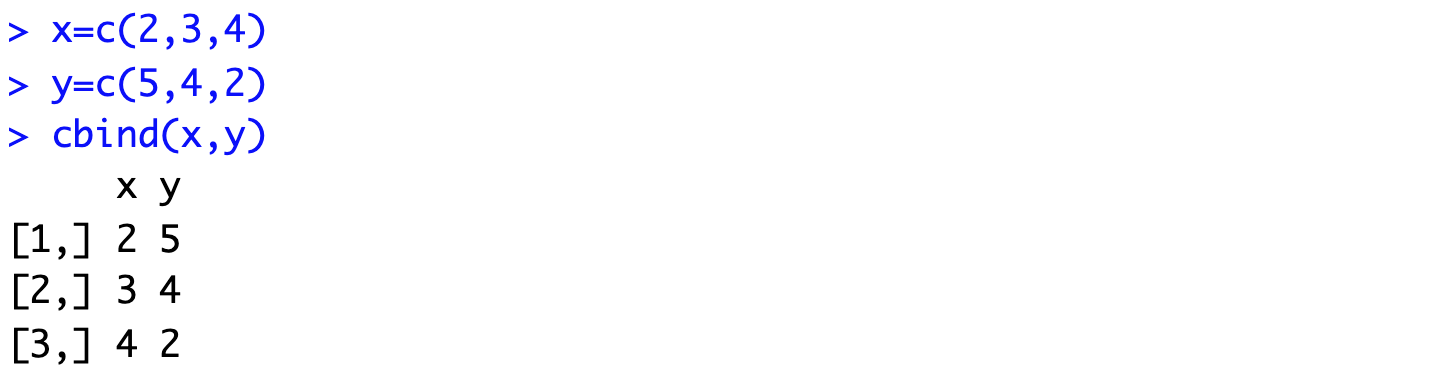

In [175]:
def cbind(x,y):
    rslt = np.stack([x,y],axis=1)
    return rslt 

In [182]:
cbind([1,1,1],[2,2,2])

()

`#`

`예제2` – 세개이상의 벡터가 온다면?

`-` args를 이용하여 이후 입력을 받음

In [190]:
def _cbind(x,y,*args):
    # args의 정체 
    print(args)
    rslt = np.stack([x,y],axis=1)
    return rslt 

In [191]:
_cbind([1,1],[2,2],[3,3])

([3, 3],)

In [192]:
_cbind([1,1,1],[2,2,2],[3,3,3],[4,4,4])

([3, 3, 3], [4, 4, 4])

-   args는 함수내부에서 “튜플”로 취급된다!!

args를 이용한 수정

In [187]:
def cbind(x,y,*args):
    #print(args)
    rslt = np.stack([x,y]+list(args),axis=1)
    return rslt 

In [188]:
cbind([1,1,1],[2,2,2])

In [189]:
cbind([1,1,1],[2,2,2],[3,3,3],[4,4,4])

`#`

`# 예제3` – 기본적으로는 cbind의 동작을 하지만 경우에 따라서 rbind처럼
동작하길 원한다면?

`-` `axis`라는 변수를 따로 생성하여 입력으로 처리, 기본값은 1

In [206]:
def bind(x,y,*args,axis=1):
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [207]:
bind([1,1,1],[2,2,2])

In [208]:
bind([1,1,1],[2,2,2],axis=0)

In [209]:
bind([1,1,1],[2,2,2],[3,3,3],axis=0)

`#`

`# 예제4` – 여러가지 옵션을 통하여 함수입력의 유형을 보고 싶다면?

In [217]:
def _bind(x,y,*args,axis=1,**kwarg):
    print(kwarg)
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [215]:
_bind([1,1,1],[2,2,2], verbose1 = True, verbose2 = True, verbose3 = True, verbose4 = True)

{'verbose1': True, 'verbose2': True, 'verbose3': True, 'verbose4': True}

In [229]:
def bind(x,y,*args,axis=1,**kwargs):
    if 'vb1' in kwargs:
        print(f'위치인자 argument: {x,y}')
    if 'vb2' in kwargs: 
        print(f'가변위치인자: {args}')
    if 'vb3' in kwargs:  
        print(f'키워드인자: {axis}')
    if 'vb4' in kwargs: 
        print(f'가변키워드인자: {kwargs}')   
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [230]:
bind([1,1,1],[2,2,2],
     vb1=True,vb2=True,vb3=True,vb4=True) 

위치인자 argument: ([1, 1, 1], [2, 2, 2])
가변위치인자: ()
키워드인자: 1
가변키워드인자: {'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}

In [232]:
bind([1,1,1],[2,2,2],[3,3,3],
     vb1=True,vb2=True,vb3=True,vb4=True) 

위치인자 argument: ([1, 1, 1], [2, 2, 2])
가변위치인자: ([3, 3, 3],)
키워드인자: 1
가변키워드인자: {'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}

In [234]:
bind([1,1,1],[2,2,2],[3,3,3],axis=0,
     vb1=True,vb2=True,vb3=True,vb4=True) 

위치인자 argument: ([1, 1, 1], [2, 2, 2])
가변위치인자: ([3, 3, 3],)
키워드인자: 0
가변키워드인자: {'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}

`#`

`# 예제5` – 위치인자를 키워드인자보다 뒤에 넣을 경우?

In [245]:
bind(axis=0,[1,2,3],[2,3,4])

In [246]:
bind([1,2,3],[2,3,4],axis=0)

In [247]:
bind([1,2,3],[2,3,4],axis=0,[3,4,5])

`#`

`# 예제5` – 키워드인자의 키를 잘못 입력할 경우?

In [253]:
bind([1,2,3],[2,3,4],ax=0)

In [255]:
bind([1,2,3],[2,3,4], verbose = True)

-   아무일없음

In [256]:
bind([1,2,3],[2,3,4],axis=3)

-   이건 문제가 있음

`-` 요약

-   함수의 입력은 꽤 복잡한 방식으로 동작한다.
-   위치인자의 위치를 잘못 넣으면 동작하지 않는다.
-   키워드인자의 키를 다른이름으로 넣으면 에러는 나지 않는다. (그냥
    무시)

`#`

`# 예제 6` – 은근히 짜증났던 `plt.plot()`

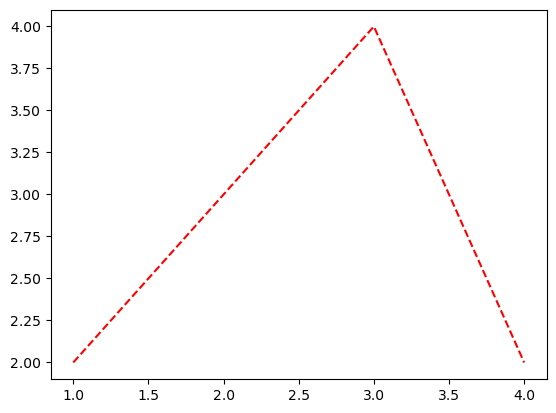

In [347]:
plt.plot([1,2,3,4],[2,3,4,2],'r--')

In [349]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')

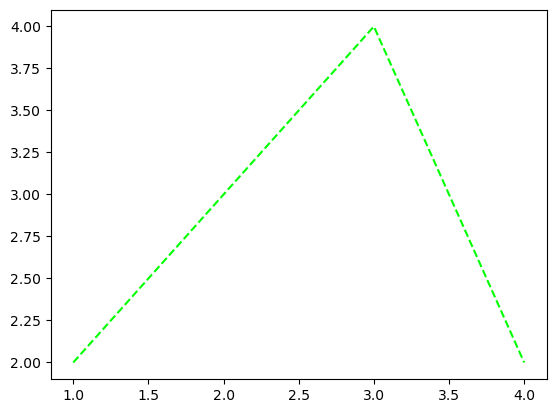

In [350]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

`#`

## B. dictionary + `pio.show()`

`# 예제1` – dictionary + `pio.show()`

In [120]:
fig = dict()
fig['data'] = [
    {"type": "bar", "x": ['female'], "y": [0.42]},
    {"type": "bar", "x": ['male'], "y": [0.52]}
]
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}

In [121]:
fig

In [122]:
pio.show(fig)

기묘하다.. 마치 `pio.show()`에 필요한 kwargs를 fig라는 이름의 dict로
전달하는 느낌임!!

In [260]:
pio.show(dict()) # 빈 딕셔너리 전달..

**요약: fig은 본질은 dictionary이며, 이는 pio.show()에 전달할 kwargs를
모아놓은 집합이다.**

`#`

`# 예제2` – `female`의 rate를 0.62로 수정

In [94]:
fig['data'][0]['y']=[0.62]

In [95]:
fig

In [96]:
pio.show(fig)

`#`

`# 예제3` – `fig`에 정리된 arg들이 전부는 아님

In [100]:
fig['data'][0]['marker'] = {'color':'#636efa'}
fig['data'][1]['marker'] = {'color':'#EF553B'}
fig

In [101]:
pio.show(fig)

`#`

# 3. `go`를 이용한 시각화

## A. `pio`와 `go`의 연결

In [271]:
fig = dict()
fig['data'] = [
    {"type": "bar", "x": ['female'], "y": [0.42]},
    {"type": "bar", "x": ['male'], "y": [0.52]}
]
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

위의 코드와 동일한 효과를 주는 코드를 알아보자.

`# 예제1` – data의 원소를 dict로 정리하여 추가

위와 동일한 코드는 아래와 같다.

In [280]:
fig = dict()
fig['data'] = list()
bar_female = {'type':'bar', "x": ['female'], "y": [0.42]}
bar_male = {'type':'bar', "x": ['male'], "y": [0.52]}
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

`#`

`# 예제2` – `go.Bar()`를 이용

위와 동일한 코드는 아래와 같다.

In [282]:
fig = dict()
fig['data'] = list()
bar_female = go.Bar({"x": ['female'], "y": [0.42]})
bar_male = go.Bar({"x": ['male'], "y": [0.52]})
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

`#`

`# 예제3` – `go.Bar()`를 이용

위와 동일한 코드는 아래와 같다.

In [283]:
fig = dict()
fig['data'] = list()
bar_female = go.Bar({"x": ['female'], "y": [0.42]})
bar_male = go.Bar({"x": ['male'], "y": [0.52]})
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

`#`

`# 예제4` – `go.Bar()`를 이용 + `go.Figure()`를 이용 + `add_trace()`이용

위와 동일한 코드는 아래와 같다.

In [308]:
fig = go.Figure()
bar_female = go.Bar({"x": ['female'], "y": [0.42]})
bar_male = go.Bar({"x": ['male'], "y": [0.52]})
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
#fig.show()
fig

`go.Bar()`를 아래와 같이 사용할수도 있다.

In [328]:
# go.Bar({"x": ['female'], "y": [0.42]})
# go.Bar(dict(x=['female'],y=[0.42]))
go.Bar(x=['female'],y=[0.42])

사실 아래와 같이 `go.Figure()`만 사용하고 `go.Bar()`는 사용하지 않아도
무방

In [329]:
fig = go.Figure()
bar_female = {'type':'bar', "x": ['female'], "y": [0.42]}
bar_male = {'type':'bar', "x": ['male'], "y": [0.52]}
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
#fig.show()
fig

`# 예제5` – `go.Bar()`를 이용 + `go.Figure()`를 이용 +
`add_trace()`이용 + `update_layout()`이용

In [330]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig.update_layout(
    {"title": {"text": "Title"},
    "width": 600}
)
fig

In [333]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig.update_layout(
    title = {"text": "Title"},
    width = 600
)
fig

`# 예제6` – `go.Bar()`를 이용 + `go.Figure()`를 이용 +
`add_traces()`이용 + `update_layout()`이용

In [339]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_traces([bar_female,bar_male])
fig.update_layout(
    {"title": {"text": "Title"},
    "width": 600}
)
fig

## B. `go`를 이용하는 추천포맷

In [352]:
fig = go.Figure()
fig.add_traces(
    [go.Bar(x=['female'], y= [0.42]),
     go.Bar(x=['male'], y= [0.52])]
)
fig.update_layout(
    title = "버클리대학교 성별합격률",
    width = 600,
    legend = {'title':'gender'}
    
)